In [ ]:
from google.colab import files

print("Please upload the 'pokemonDB_dataset.csv' file:")
uploaded = files.upload()

# The file is now available in the Colab environment

Please upload the 'pokemonDB_dataset.csv' file:


Saving pokemonDB_dataset.csv to pokemonDB_dataset.csv


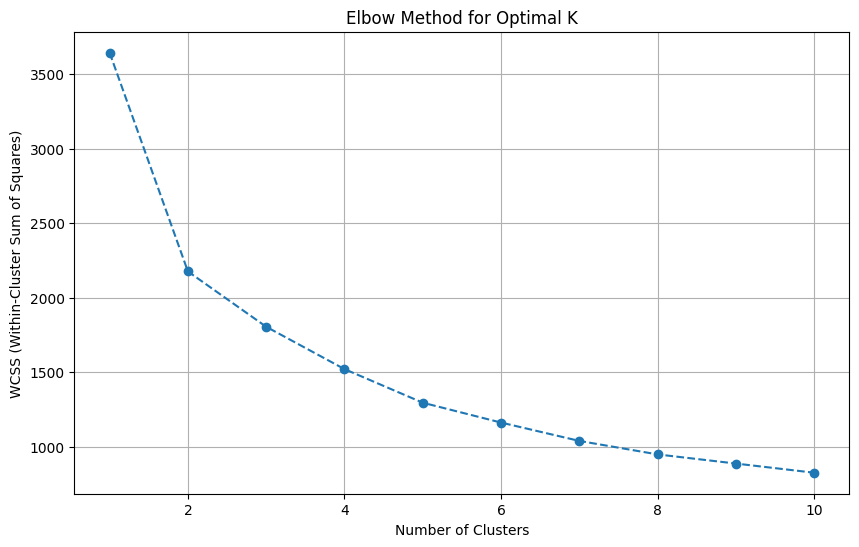

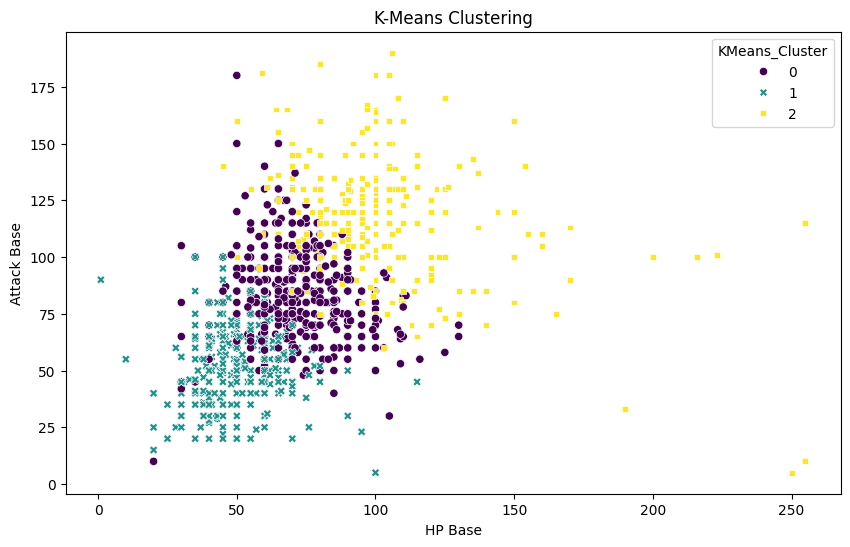


K-Means Clustering complete. 'KMeans_Cluster' column added to dataframe.


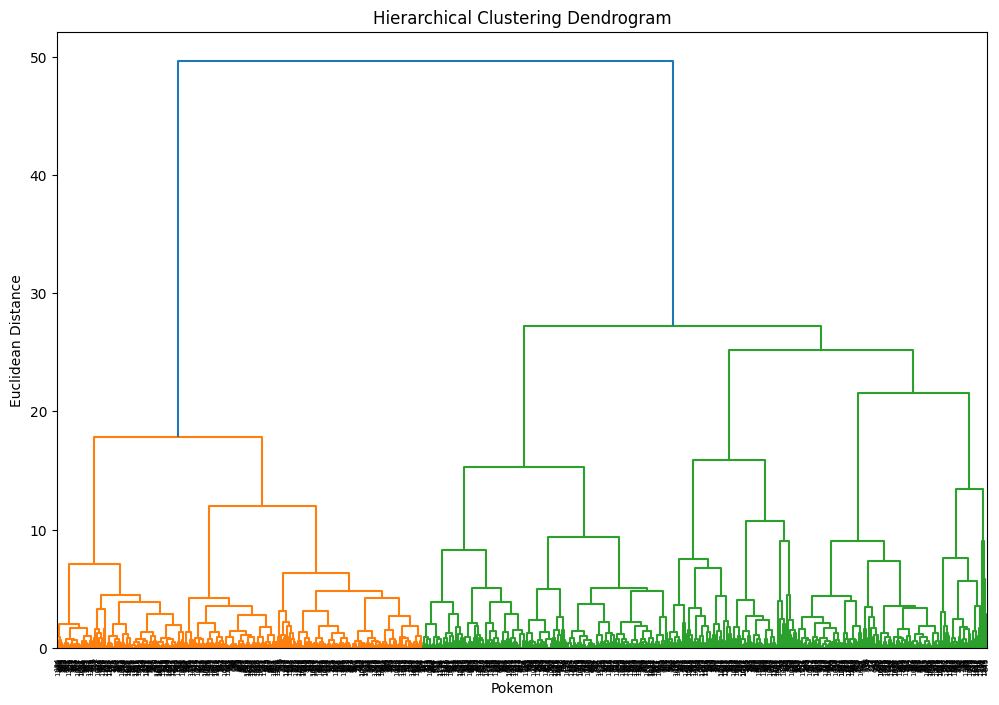

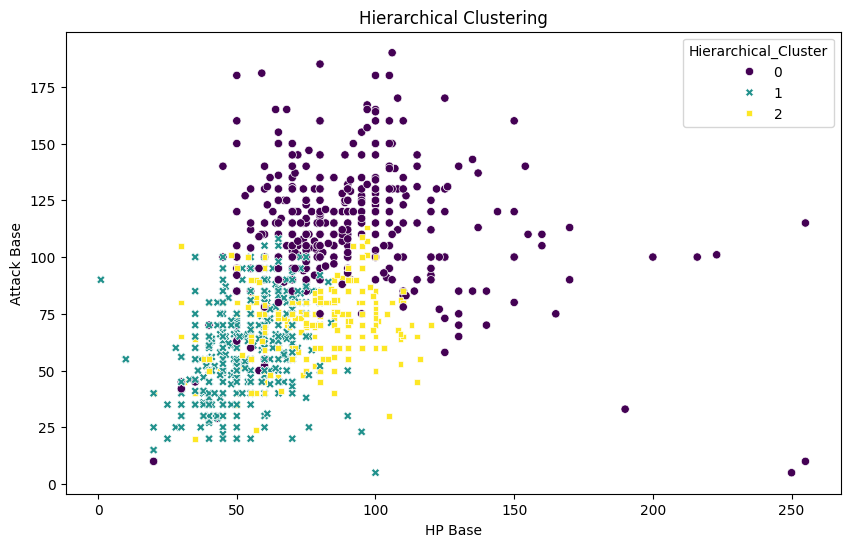


Hierarchical Clustering complete. 'Hierarchical_Cluster' column added to dataframe.


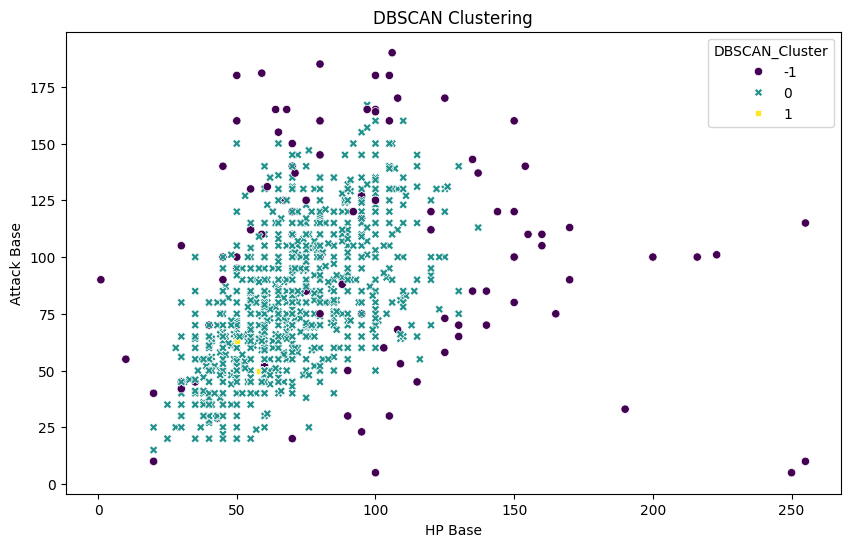


DBSCAN Clustering complete. 'DBSCAN_Cluster' column added to dataframe.


In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('pokemonDB_dataset.csv')

# Select the numerical columns for clustering
features = ['HP Base', 'Attack Base', 'Defense Base']
X = df[features]

# Scale the features
# This is a critical step for many clustering algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering

# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.savefig('kmeans_elbow_plot.png')
plt.show()

# Based on the plot, select the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the K-Means clusters (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['HP Base'], y=X['Attack Base'], hue=df['KMeans_Cluster'], palette='viridis', style=df['KMeans_Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('HP Base')
plt.ylabel('Attack Base')
plt.savefig('kmeans_clusters.png')
plt.show()

print("\nK-Means Clustering complete. 'KMeans_Cluster' column added to dataframe.")

# ----------------------------------------------------------------------------------------------------------------------

## Hierarchical Clustering

# Create a dendrogram to visualize the clusters
plt.figure(figsize=(12, 8))
dendro = dendrogram(linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Euclidean Distance')
plt.savefig('hierarchical_dendrogram.png')
plt.show()

# Apply Hierarchical Clustering based on the dendrogram (e.g., 3 clusters)
n_clusters_hierarchical = 3
hc = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)

# Visualize the Hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['HP Base'], y=X['Attack Base'], hue=df['Hierarchical_Cluster'], palette='viridis', style=df['Hierarchical_Cluster'])
plt.title('Hierarchical Clustering')
plt.xlabel('HP Base')
plt.ylabel('Attack Base')
plt.savefig('hierarchical_clusters.png')
plt.show()

print("\nHierarchical Clustering complete. 'Hierarchical_Cluster' column added to dataframe.")

# ----------------------------------------------------------------------------------------------------------------------

## DBSCAN Clustering

# Apply DBSCAN clustering
# You may need to tune the 'eps' and 'min_samples' parameters based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN clusters. Note that some points might be noise (-1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['HP Base'], y=X['Attack Base'], hue=df['DBSCAN_Cluster'], palette='viridis', style=df['DBSCAN_Cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('HP Base')
plt.ylabel('Attack Base')
plt.savefig('dbscan_clusters.png')
plt.show()

print("\nDBSCAN Clustering complete. 'DBSCAN_Cluster' column added to dataframe.")

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Assuming you have the 'df' DataFrame and 'X_scaled' data from the previous steps

print("--- Comparing Clustering Models ---")

# Evaluate K-Means
kmeans_clusters = df['KMeans_Cluster']
if len(set(kmeans_clusters)) > 1:
    silhouette_kmeans = silhouette_score(X_scaled, kmeans_clusters)
    calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_clusters)
    print(f"K-Means:\n  Silhouette Score: {silhouette_kmeans:.4f}\n  Calinski-Harabasz Index: {calinski_kmeans:.4f}\n")
else:
    print("K-Means: Cannot compute scores, as only one cluster was found.")

# Evaluate Hierarchical Clustering
hierarchical_clusters = df['Hierarchical_Cluster']
if len(set(hierarchical_clusters)) > 1:
    silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_clusters)
    calinski_hierarchical = calinski_harabasz_score(X_scaled, hierarchical_clusters)
    print(f"Hierarchical Clustering:\n  Silhouette Score: {silhouette_hierarchical:.4f}\n  Calinski-Harabasz Index: {calinski_hierarchical:.4f}\n")
else:
    print("Hierarchical Clustering: Cannot compute scores, as only one cluster was found.")
D
# Evaluate DBSCAN
dbscan_clusters = df['DBSCAN_Cluster']
# Note: DBSCAN can produce a single cluster (-1, representing all noise), which is not suitable for these metrics
if len(set(dbscan_clusters)) > 1 and -1 in set(dbscan_clusters):
    # Filter out noise points for a more meaningful comparison
    X_filtered = X_scaled[dbscan_clusters != -1]
    clusters_filtered = dbscan_clusters[dbscan_clusters != -1]
    if len(set(clusters_filtered)) > 1:
        silhouette_dbscan = silhouette_score(X_filtered, clusters_filtered)
        calinski_dbscan = calinski_harabasz_score(X_filtered, clusters_filtered)
        print(f"DBSCAN (excluding noise):\n  Silhouette Score: {silhouette_dbscan:.4f}\n  Calinski-Harabasz Index: {calinski_dbscan:.4f}\n")
    else:
        print("DBSCAN: Cannot compute scores, as all points were found to be noise or a single cluster after filtering.")
elif len(set(dbscan_clusters)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_clusters)
    calinski_dbscan = calinski_harabasz_score(X_scaled, dbscan_clusters)
    print(f"DBSCAN:\n  Silhouette Score: {silhouette_dbscan:.4f}\n  Calinski-Harabasz Index: {calinski_dbscan:.4f}\n")
else:
    print("DBSCAN: Cannot compute scores, as only one cluster was found (or all points were noise).")

--- Comparing Clustering Models ---
K-Means:
  Silhouette Score: 0.2740
  Calinski-Harabasz Index: 618.0500

Hierarchical Clustering:
  Silhouette Score: 0.2087
  Calinski-Harabasz Index: 475.3813

DBSCAN (excluding noise):
  Silhouette Score: 0.3358
  Calinski-Harabasz Index: 15.5256

